In [7]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

# suppress warning/error messages in terminal
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# load in data from mnist dataset (60k training, 10k test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape and convert to one-hot
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# split main training set into train/validation sets (6k out of 60k data points reserved for validation)
x_validate = x_train[:6000, :]
y_validate = y_train[:6000, :]
x_train = x_train[6000:, :]
y_train = y_train[6000:, :]

'''
Building layers for the feedforward NN:
Hidden layers have 56, 96, 96, and 56 nodes, in that order.
Takes in 784 values (pixel input) and outputs 10 values (predicted probability for each number, 0-9).
'''
model = models.Sequential()
model.add(layers.Dense(56,activation='tanh',input_shape=(784,)))
model.add(layers.Dense(96,activation='tanh'))
model.add(layers.Dense(96,activation='tanh'))
model.add(layers.Dense(56,activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
			  optimizer='adam',
			  metrics=['accuracy'])



Epoch 1/20
106/106 - 1s - loss: 0.8435 - accuracy: 0.7430 - val_loss: 0.4569 - val_accuracy: 0.8613 - 774ms/epoch - 7ms/step
Epoch 2/20
106/106 - 0s - loss: 0.4382 - accuracy: 0.8666 - val_loss: 0.3778 - val_accuracy: 0.8848 - 488ms/epoch - 5ms/step
Epoch 3/20
106/106 - 0s - loss: 0.3559 - accuracy: 0.8910 - val_loss: 0.3177 - val_accuracy: 0.9037 - 468ms/epoch - 4ms/step
Epoch 4/20
106/106 - 0s - loss: 0.3335 - accuracy: 0.8963 - val_loss: 0.3060 - val_accuracy: 0.9030 - 450ms/epoch - 4ms/step
Epoch 5/20
106/106 - 0s - loss: 0.3009 - accuracy: 0.9059 - val_loss: 0.2942 - val_accuracy: 0.9123 - 471ms/epoch - 4ms/step
Epoch 6/20
106/106 - 1s - loss: 0.2950 - accuracy: 0.9078 - val_loss: 0.3070 - val_accuracy: 0.9000 - 502ms/epoch - 5ms/step
Epoch 7/20
106/106 - 1s - loss: 0.2719 - accuracy: 0.9149 - val_loss: 0.2731 - val_accuracy: 0.9143 - 527ms/epoch - 5ms/step
Epoch 8/20
106/106 - 0s - loss: 0.2569 - accuracy: 0.9197 - val_loss: 0.2448 - val_accuracy: 0.9222 - 491ms/epoch - 5ms/step


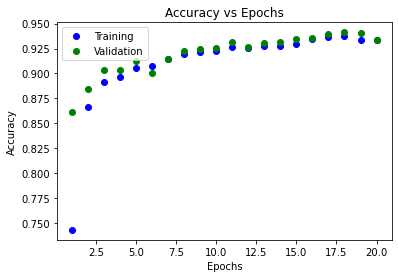

In [8]:
# training the NN
epochs = 20
history = model.fit(x_train,y_train,epochs=epochs,batch_size=512,verbose=2,validation_data=(x_validate,y_validate))
print("Finished fitting.")

# plotting learning curves during training (on both training and validation data)
epoch_labels = range(1, epochs+1)
hist_dict = history.history
plt.title("Accuracy vs Epochs")
plt.plot(epoch_labels, hist_dict["accuracy"],'bo', label="Training")
plt.plot(epoch_labels, hist_dict["val_accuracy"],'go', label="Validation")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# evaluating final performance using test data
print("Checking accuracy on test set...")
acc = model.evaluate(x_test,y_test,batch_size=512)
print("\nAccuracy on test set: " + str(acc[1]))
plt.show()